In [18]:
import pandas as pd
import numpy as np

In [130]:
from sklearn.metrics import accuracy_score

In [78]:
import matplotlib.pyplot as plt

In [7]:
from sklearn.ensemble import RandomForestClassifier

In [13]:
from sklearn.model_selection import train_test_split

**Read in data**

In [133]:
df = pd.read_csv('../data/noise_3_processed.csv')

random_forest_on = ["cluster_on_0.05", "cluster_on_0.25", "cluster_on_0.5"]
labels = ["5%", "25%", "50%"]

In [134]:
features = [
    "CC_to_C_rate",
    "CD_to_C_rate",
    "DC_to_C_rate",
    "DD_to_C_rate",
    "SSE",
    "Makes_use_of_game",
    "Makes_use_of_length",
    "Stochastic",
    "Cooperation_rating",
    "Cooperation_rating_max",
    "Cooperation_rating_min",
    "Cooperation_rating_median",
    "Cooperation_rating_mean",
    "Cooperation_rating_comp_to_max",
    "Cooperation_rating_comp_to_min",
    "Cooperation_rating_comp_to_median",
    "Cooperation_rating_comp_to_mean",
    "repetitions",
    "size",
    "turns"
]

In [135]:
def random_forest_analysis(X, y, n_estimators=10):
    forest = RandomForestClassifier(
            n_estimators=n_estimators, random_state=0, oob_score=True
        )
    forest.fit(X, y)
    importances = forest.feature_importances_

    std = np.std(
        [tree.feature_importances_ for tree in forest.estimators_], axis=0
    )
    indices = np.argsort(importances)[::-1]

    return forest, importances, std, indices

In [136]:
target_value = random_forest_on[2]

In [137]:
target_value

'cluster_on_0.5'

In [138]:
X = df[features].values
y = df[target_value].values

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42
)

random_forest, importances, std, indices = random_forest_analysis(
    X_train, y_train,
)

//anaconda3/envs/axlml/lib/python3.6/site-packages/sklearn/ensemble/forest.py:460: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
//anaconda3/envs/axlml/lib/python3.6/site-packages/sklearn/ensemble/forest.py:465: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


In [139]:
random_forest.score(X_train, y_train)

0.99699767029906

In [140]:
random_forest.score(X_test, y_test)

0.9513826711645308

In [141]:
random_forest.oob_score_

0.9381493354635719

In [142]:
predictions = random_forest.predict(X_test)

In [143]:
predictions[100], y_test[100]

(0, 0)

In [144]:
errors = abs(predictions - y_test)

In [145]:
score = accuracy_score(y_test, predictions)

In [146]:
score

0.9513826711645308

In [147]:
all(predictions == y_test)

False

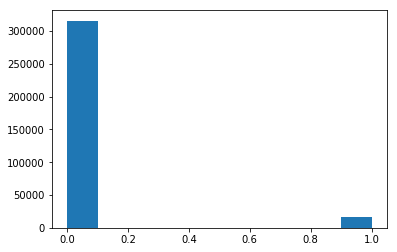

In [148]:
plt.hist(errors);

In [149]:
sum(errors == True)

16127